In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"D:\Data\both 800fps\brightfield\*tif"

In [3]:
oog = OG.BasicOpticalGating()#.default()
oog.sequence_manager.set_source(data_src)
oog.run()

Setting source to D:\Data\both 800fps\brightfield\*tif
Getting reference sequence
Reference period: 306.2209554777414; Reference indices: [111, 422]
Getting SADs
Getting phases


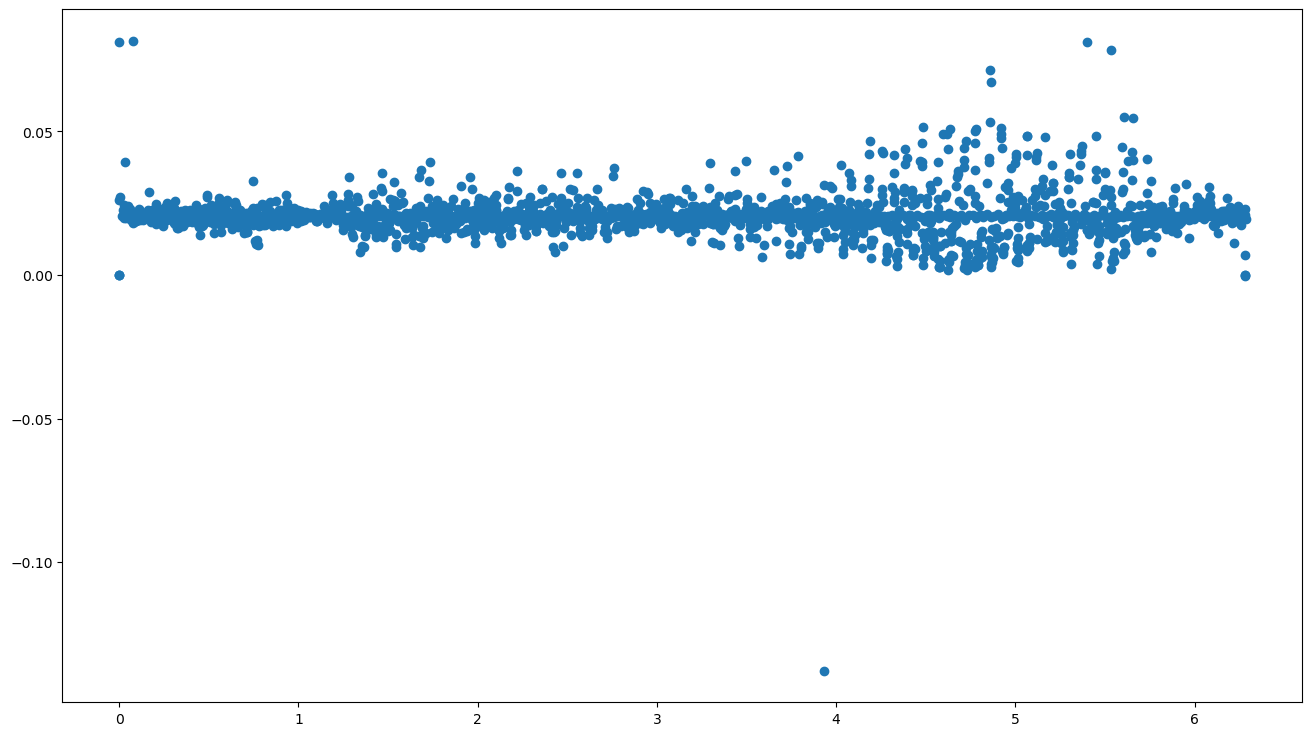

In [4]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases)
plt.show()

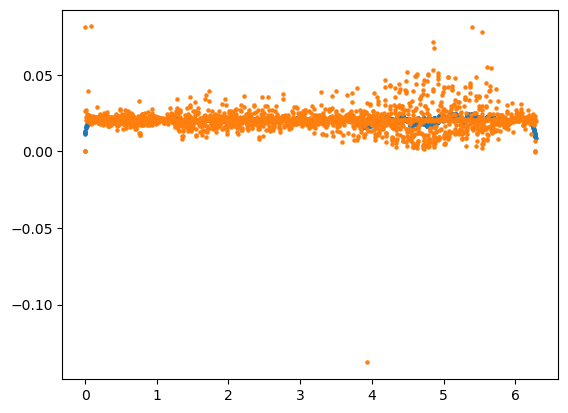

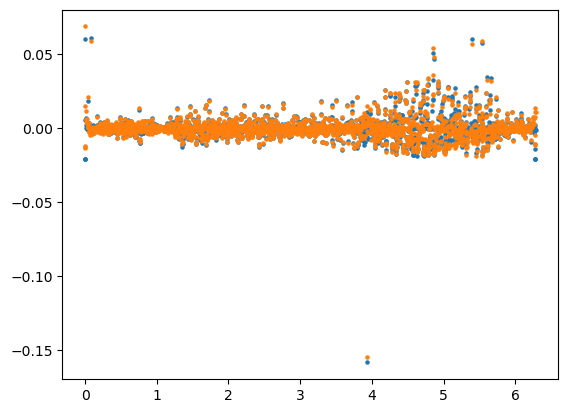

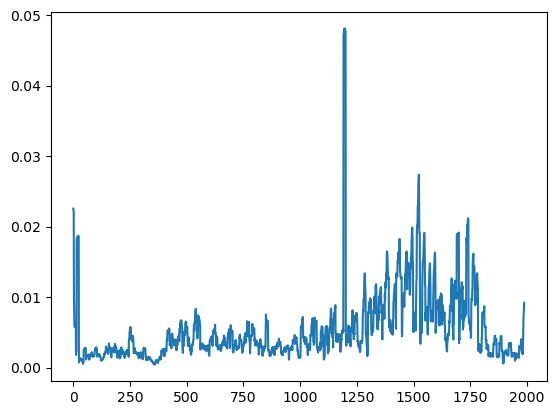

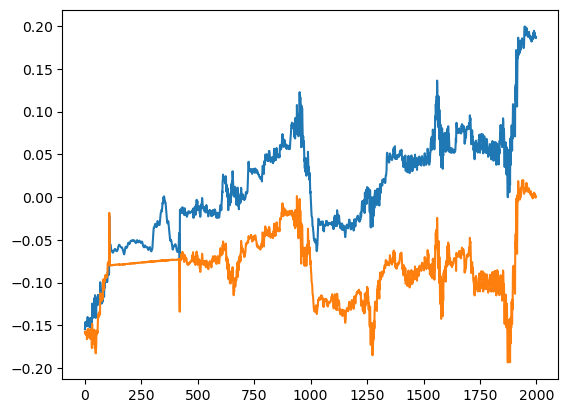

In [10]:
order = np.argsort(oog.phases[1::])
# Get moving average of the phase-delta phase plot
window = 40
weights = np.repeat(1.0, window)/window
ma = np.convolve(oog.delta_phases[order], weights, 'same')

plt.scatter(oog.phases[1::], ma[np.argsort(order)], s = 5)
plt.scatter(oog.phases[1::], oog.delta_phases, s = 5)
plt.show()
# Subtract moving average from delta phase
delta_phases = oog.delta_phases - ma[np.argsort(order)]
# and plot
plt.scatter(oog.phases[1::], oog.delta_phases - np.mean(oog.delta_phases), s = 5)
plt.scatter(oog.phases[1::], delta_phases, s = 5)
plt.show()

# Get moving average of standard deviation of delta phases
moving_range = 10
stds = []
for i in range(len(delta_phases)-moving_range*1):
    stds.append(np.std(delta_phases[order][i:i+moving_range]))

plt.plot(stds)
plt.show()


plt.plot(np.cumsum(delta_phases))
plt.plot(np.cumsum(oog.delta_phases - np.mean(oog.delta_phases)))
plt.show()

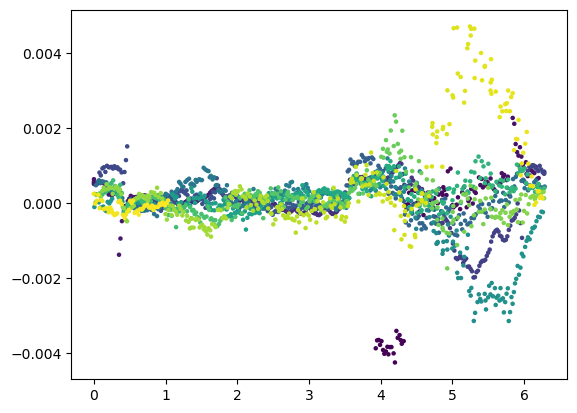

In [6]:
plt.scatter(oog.phases[1::], np.convolve(delta_phases, np.repeat(1.0, 38)/38, 'same'),c = np.arange(len(oog.phases[1::])), cmap = 'viridis', s = 5)
plt.show()

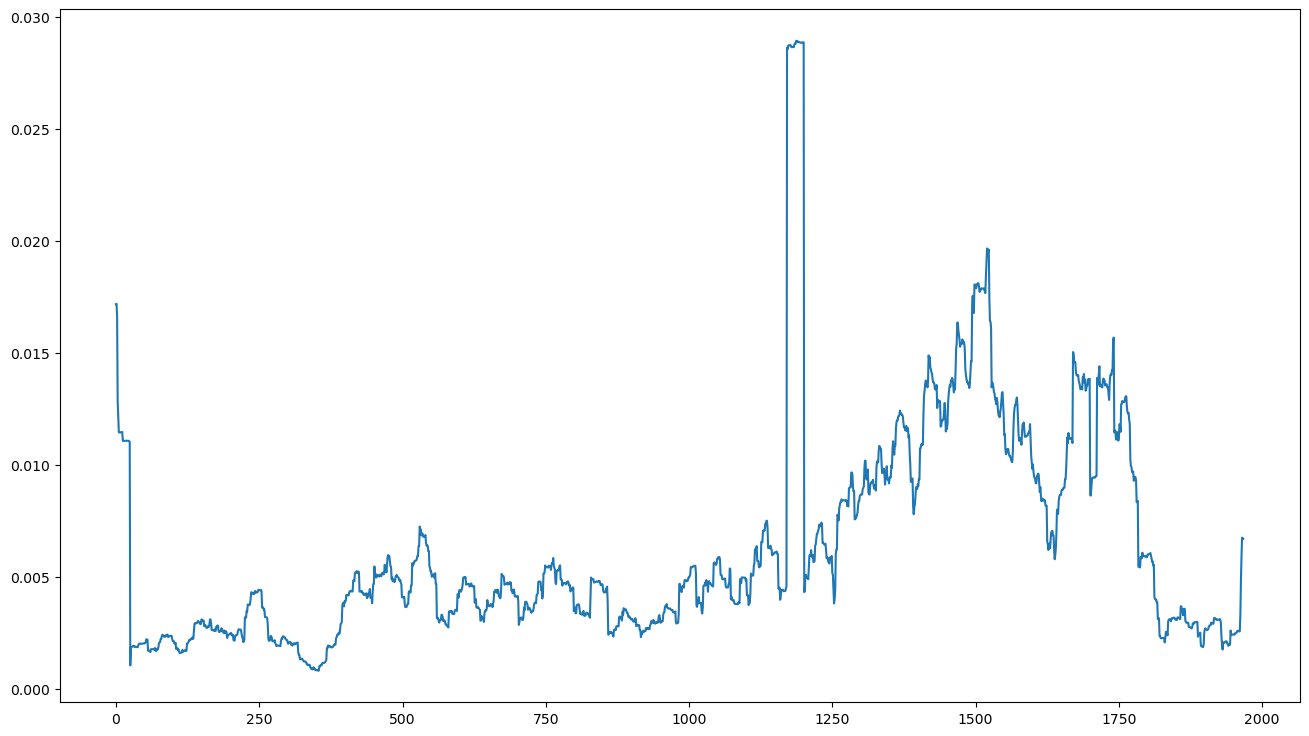

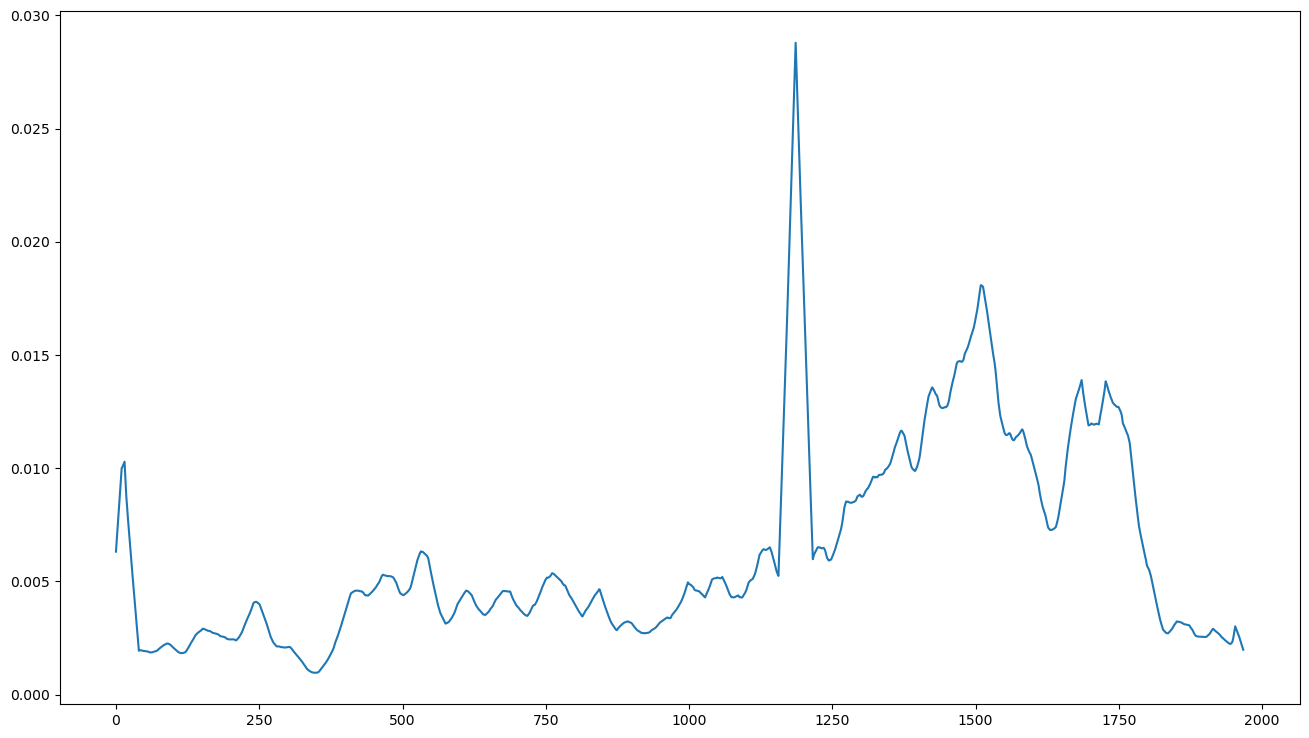

In [7]:
order = np.argsort(oog.phases[1::])
delta_phases_sorted = oog.delta_phases[order]

moving_range = 30
stds = []
for i in range(len(delta_phases_sorted)-moving_range):
    stds.append(np.std(delta_phases_sorted[i:i+moving_range]))

plt.figure(figsize = (16,9))
plt.plot(stds)
plt.show()

# Plot moving average of stds

plt.figure(figsize = (16,9))
plt.plot(np.convolve(stds, np.ones(moving_range)/moving_range, mode = 'same'))
plt.show()

In [8]:
print(np.where(oog.delta_phases > -0.05))

(array([   1,    2,    3, ..., 1995, 1996, 1997], dtype=int64),)


In [9]:
# Bin our phases into 0 to pi and pi to 2pi

print(np.std(oog.delta_phases[np.where(oog.phases[1::] < np.pi)]))
print(np.std(oog.delta_phases[np.where(oog.phases[1::] > np.pi)]))

0.004773476556909341
0.010540825758405854
